# AIM : Trying out different Methods of Data Visualization

## Importing required Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Importing Training Dataset 

In [4]:
passengers = pd.read_csv('titanicTrainingData.csv')
passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Plotting Correspondance

1. Neither *Name* nor *PassengerId* will influence whether the person survives or dies, hence they can be dropped. This is also true for *Ticket* and *Cabin*.
2. Since it is difficult to work with `str` datatype, *Sex* and *Embarked* are changed to `numeric` datatype.
3. In *Sex* column, *female* is Encoded as 1 and *male* is Encoded as 2.
4. *Embarked* may have some correspondance to survival, although somewhat vague, so it is retained.
    1. *C* is Encoded as 1
    2. *Q* is Encoded as 2
    3. *S* is Encoded as 3

In [5]:
factors = passengers.drop(['Name','PassengerId','Ticket','Cabin'], axis=1)
factors['Sex'] = factors['Sex'].replace(['female','male'],[1,2])
factors['Embarked'] = factors['Embarked'].replace(['C','Q','S'],[1,2,3])
factors

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,2,22.0,1,0,7.2500,3.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,3.0
3,1,1,1,35.0,1,0,53.1000,3.0
4,0,3,2,35.0,0,0,8.0500,3.0
...,...,...,...,...,...,...,...,...
886,0,2,2,27.0,0,0,13.0000,3.0
887,1,1,1,19.0,0,0,30.0000,3.0
888,0,3,1,NaN,1,2,23.4500,3.0
889,1,1,2,26.0,0,0,30.0000,1.0


   ## Plotting the correlation with *Survived* class

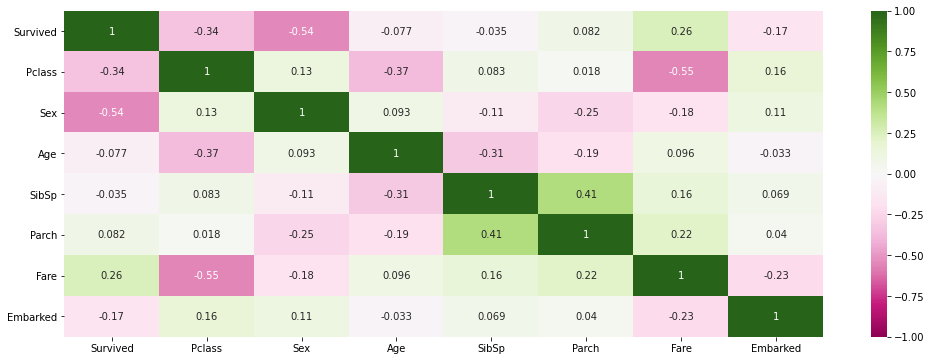

In [6]:
plt.figure(figsize=(17,6))
heatmap = sns.heatmap(factors.corr(), vmin=-1, vmax=1, annot=True, cmap='PiYG')

Thus we can conclude that *Survived* passangers have a strong correlation with *Pclass* and *Sex* and *Fare* to some extent and, a weaker correlation with *Embarked* and negligible correlation with others.

## Pairplots among all possible Factors

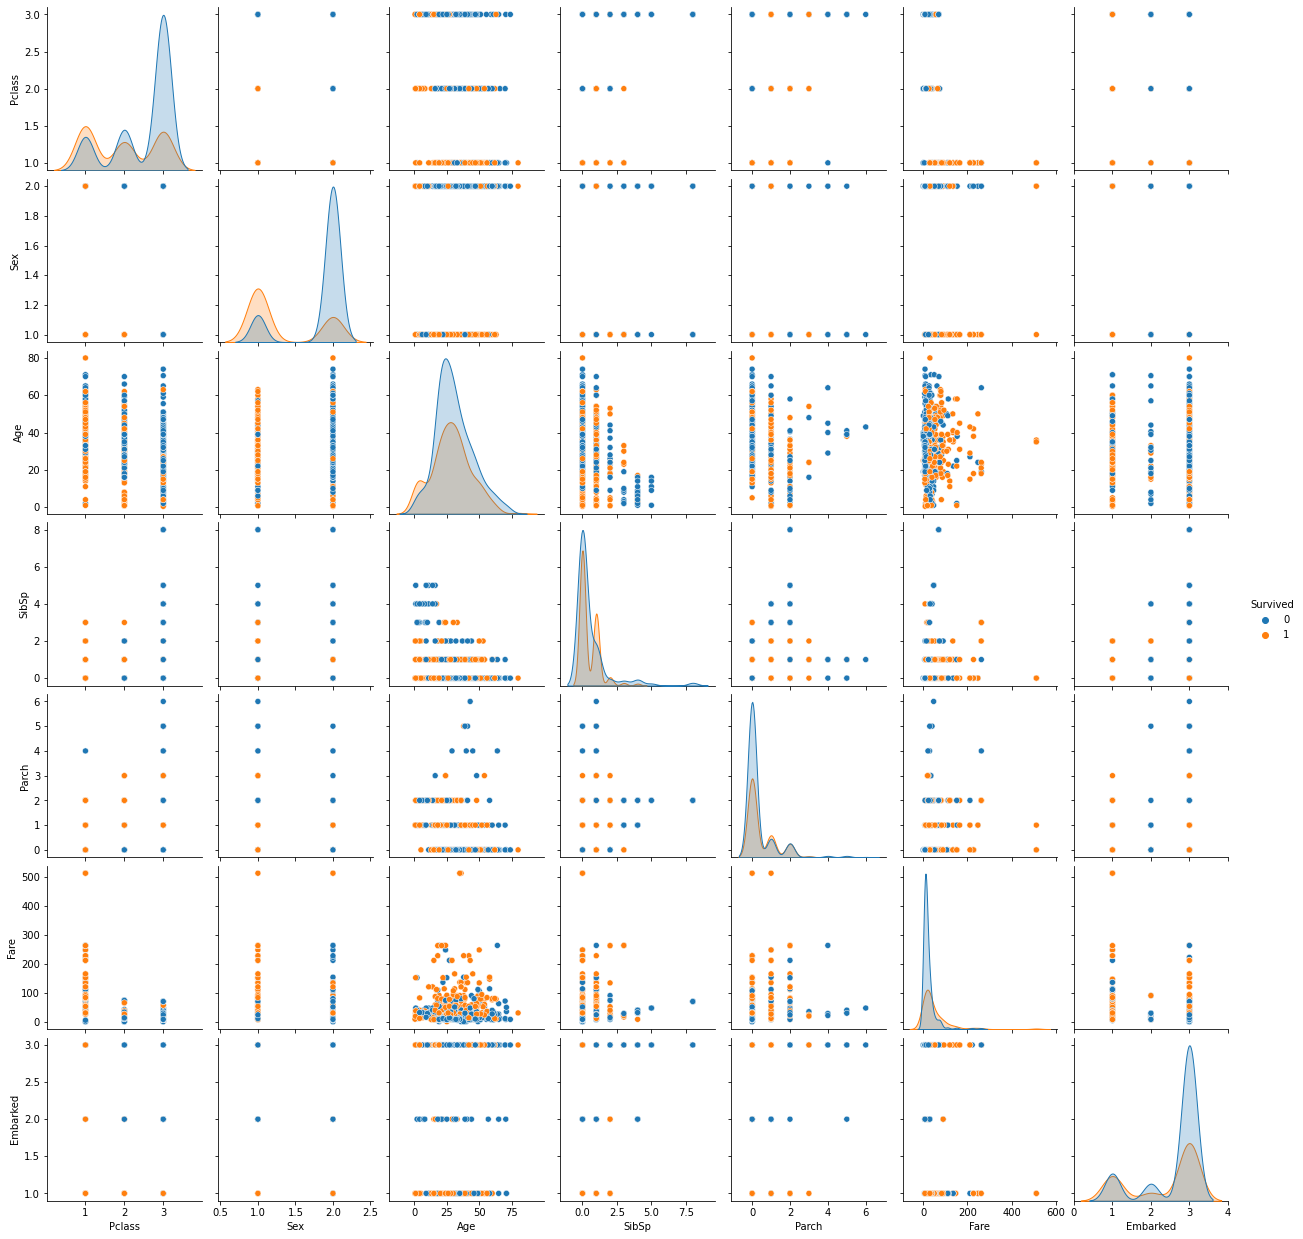

In [7]:
sns.pairplot(factors, hue='Survived')
sns.set_style('whitegrid')
plt.show()

## Plotting *Survived* passengers w.r.t *Sex*

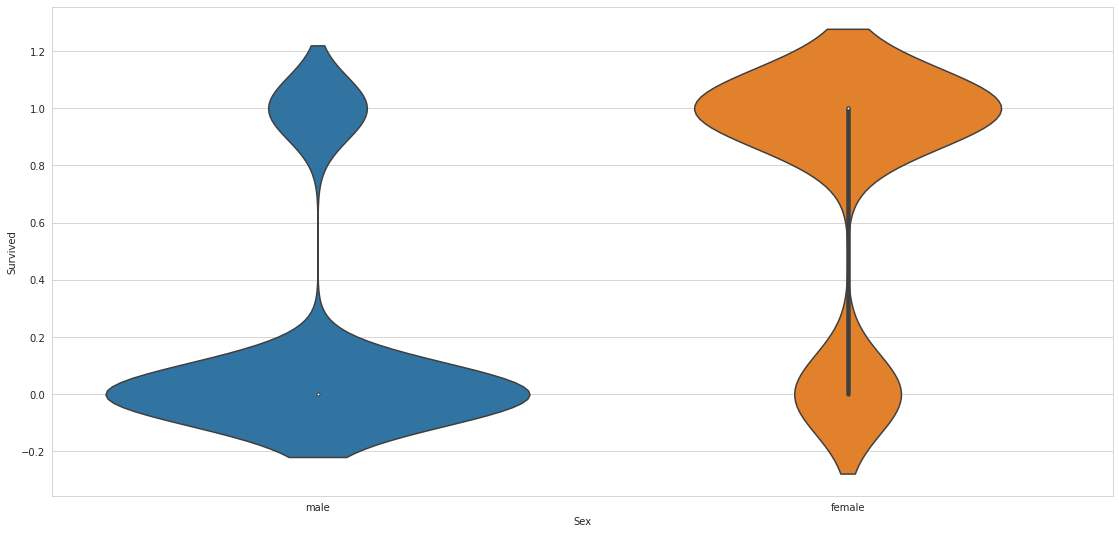

In [8]:
plt.figure(figsize=(19,9))
sns.violinplot(x="Sex", y="Survived", data=passengers)
plt.show()

## Plotting *Survived* passengers w.r.t *Fare*

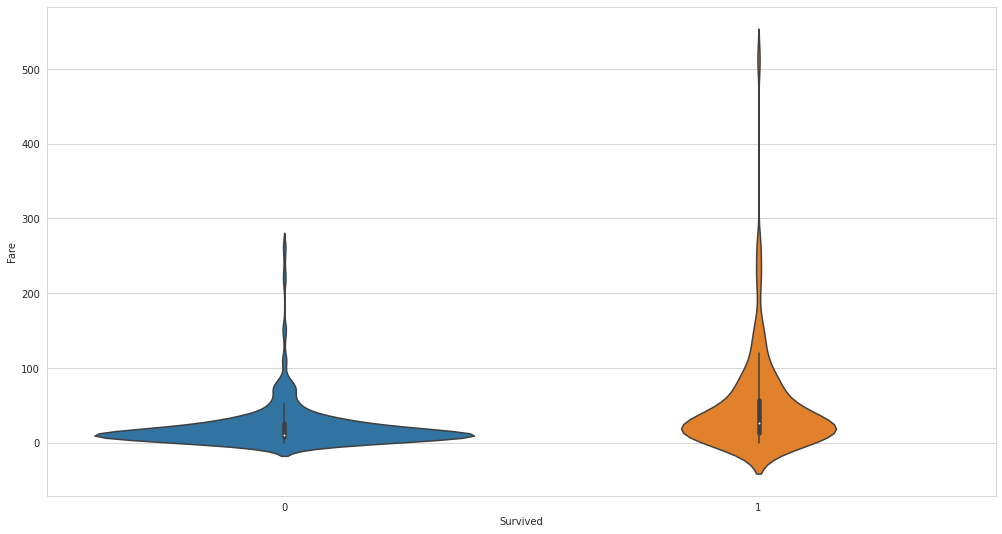

In [9]:
plt.figure(figsize=(17,9))
sns.violinplot(x="Survived", y="Fare", data=passengers)
plt.show()

## Plotting *Survived* passengers w.r.t *Pclass*

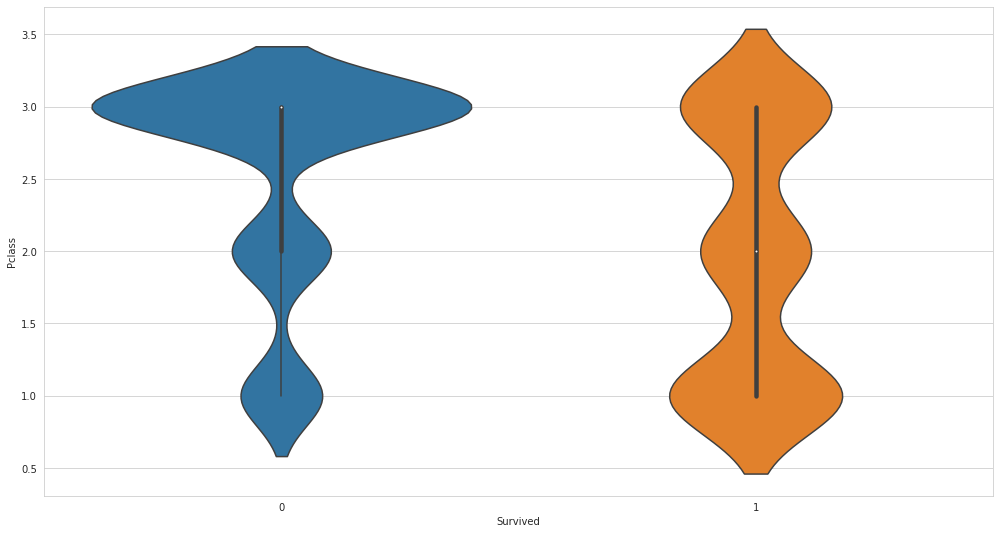

In [10]:
plt.figure(figsize=(17,9))
sns.violinplot(x="Survived", y="Pclass", data=passengers)
plt.show()

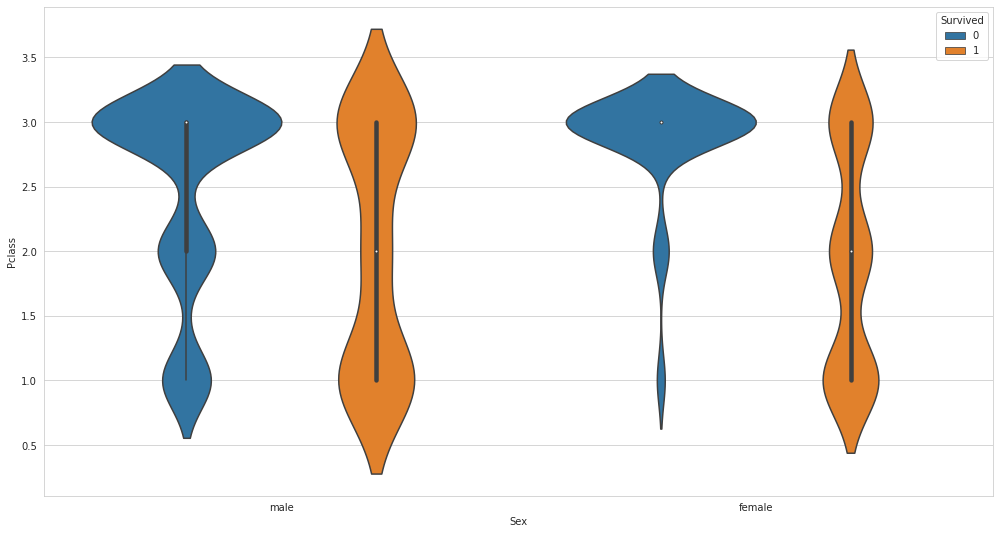

In [11]:
plt.figure(figsize=(17,9))
sns.violinplot(x="Sex", y="Pclass", hue="Survived", data=passengers)
plt.show()

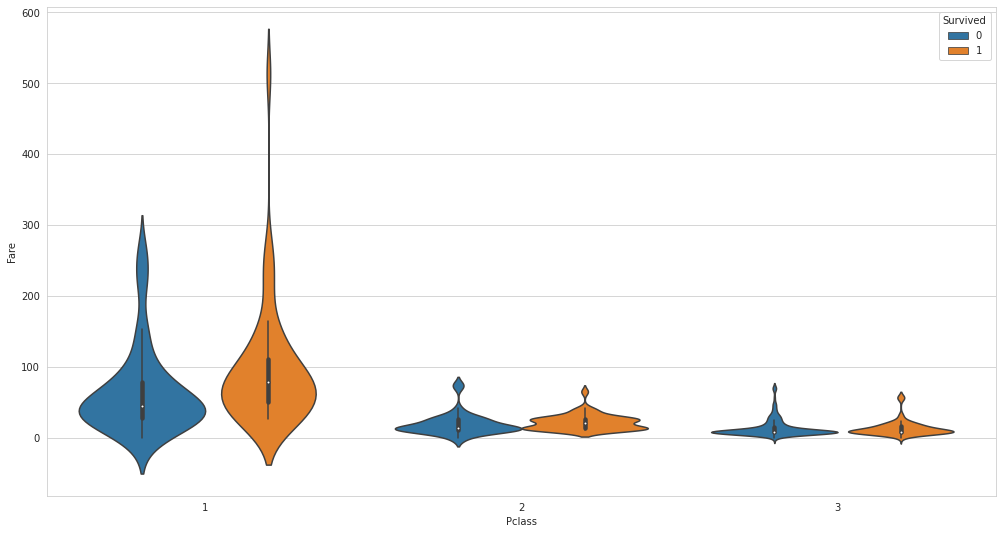

In [12]:
plt.figure(figsize=(17,9))
sns.violinplot(y="Fare", x="Pclass", hue="Survived", data=passengers)
plt.show()

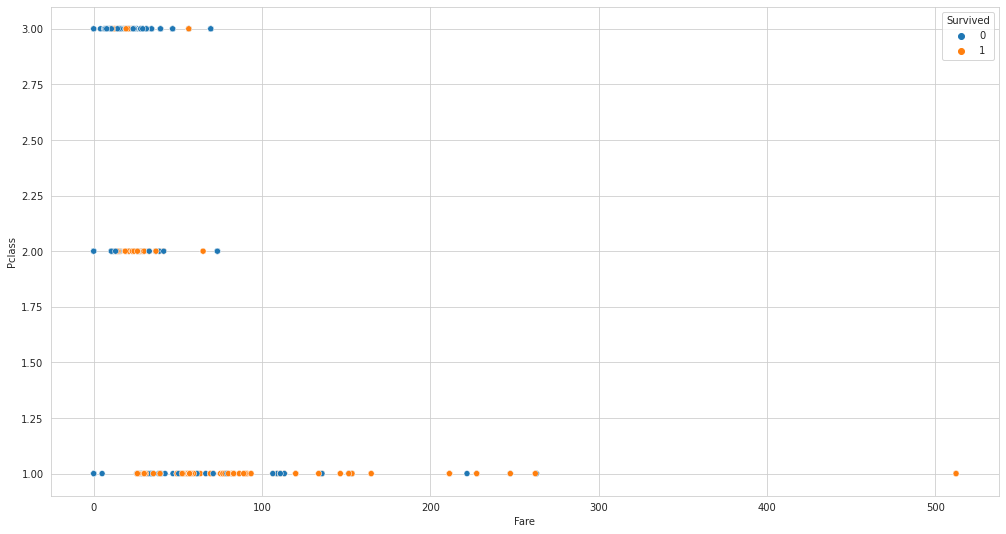

In [13]:
plt.figure(figsize=(17,9))
sns.set_style('whitegrid')
sns.scatterplot(x='Fare',y='Pclass',hue='Survived',data=passengers)
plt.show()

## Feature Engineering

In [14]:
factors = factors[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']]
factors.isnull().values.any()
factors.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64

In [15]:
factors['Age'] = factors['Age'].fillna(factors['Age'].mean())
factors['Embarked'] = factors['Embarked'].fillna(factors['Embarked'].median())
factors.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [16]:
factors.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,2,22.0,1,0,7.2500,3.0,0
1,1,1,38.0,1,0,71.2833,1.0,1
2,3,1,26.0,0,0,7.9250,3.0,1
3,1,1,35.0,1,0,53.1000,3.0,1
4,3,2,35.0,0,0,8.0500,3.0,0


In [17]:
x=factors.iloc[:,0:7]
y=factors.iloc[:,7:8]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((712, 7), (179, 7), (712, 1), (179, 1))

In [18]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# ML Algorithms

## Building a comparative chart (with default values)

### Stochastic Gradient Descent

In [19]:
from sklearn import linear_model
sgd = linear_model.SGDClassifier()
sgd.fit(x_train, y_train.values.ravel())
y_pred = sgd.predict(x_test)

sgd_score = sgd.score(x_train, y_train)

### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train.values.ravel())

Y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
rf_score = random_forest.score(x_train, y_train)

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(x_train, y_train.values.ravel())
y_pred = logreg.predict(x_test)
lr_score = logreg.score(x_train, y_train)

### K Nearest Neighbours

In [22]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train.values.ravel())
y_pred = knn.predict(x_test)
knn_score = knn.score(x_train, y_train)

### Gaussian Naive Bayes

In [23]:
gnb = GaussianNB()
gnb.fit(x_train, y_train.values.ravel())  
y_pred = gnb.predict(y_test)
gnb_score = gnb.score(x_train, y_train)

### Perceptron

In [28]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train.values.ravel())

y_pred = perceptron.predict(x_test)

perceptron_score = perceptron.score(x_train, y_train)

### Suppot Vector Machine

In [25]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train.values.ravel())

y_pred = svm.predict(x_test)

svm_score = svm.score(x_train, y_train)

### Decision Trees

In [26]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train.values.ravel())
y_pred = decision_tree.predict(x_test)  
dt_score = decision_tree.score(x_train, y_train)

## Comparing the Scores

In [32]:
results = pd.DataFrame({
    'Model': ['Stochastic Gradient Descent','Random Forest','Logistic Regression',
             'K Nearest Neighbors','Gaussian Naive Bayes','Perceptron','Support Vector Machine',
             'Decision Trees'],
    'Score': [sgd_score, rf_score, lr_score, knn_score, gnb_score, perceptron_score, 
             svm_score, dt_score]})
results.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,0.981742
7,Decision Trees,0.981742
3,K Nearest Neighbors,0.870787
6,Support Vector Machine,0.842697
2,Logistic Regression,0.796348
4,Gaussian Naive Bayes,0.789326
0,Stochastic Gradient Descent,0.754213
5,Perceptron,0.730337


## K Nearest Neighbours

In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

k_lim = range(1,125)
scores = []
for k in k_lim:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train.values.ravel())
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))

plt.figure(figsize = (17,9))
plt.plot(k_lim,scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Prediction Accuracy')
print(scores.index(max(scores)),':',max(scores))

### Hence it shows that the highest score is given for k = 16

In [ ]:
training_accuracy  = []  
test_accuracy = []
for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train.values.ravel())
    training_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize = (17,9))
plt.plot(range(1,51), training_accuracy, 
label='Training Accuarcy')
plt.plot(range(1,51), test_accuracy, label='Testing Accuarcy')
plt.title('Training Accuracy vs Test Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.ylim([0.75, 1.0])
plt.legend(loc='best')
plt.show()

### Since the training accuracy and test accuracy is very close, hence its a good model.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(x_train,y_train.values.ravel())
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(x_train, y_train.values.ravel())
y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)

In [ ]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, x_train, y_train.values.ravel(), cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

In [ ]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')